#Лабораторна робота №2#

*алгоритми кодування*
<br>
Виконували: Ковальчук Катерина, Гуменюк Денис

*Алгоритм Гаффмана*

Виконала Ковальчук Катерина
<br>

*у мене для зчитки файлу треба задавати повний шлях до файла, тому при перевірці це треба фрахувати і змінити за потреби

In [47]:
file_path0 = "huffman_test_files/Haffman.txt"
file_path1 = "huffman_test_files/ChornaRada.txt"
file_path2 = "huffman_test_files/PerehresniStezky.txt"
file_path3 = "huffman_test_files/test.txt"
file_path4 = "huffman_test_files/text.txt"
lst_files = [file_path0, file_path3, file_path4, file_path1,  file_path2]

Для реалізації алгоритму Гаффмана нам потрібно зчитати дані з файлу, що робить функція read_file. Оскільки наприкінці лабораторної нам треба буде порівняти декодоване і оригінальне повідомлення, то я оригінал зберігаю у змінну file_text, а у data записую текст посимвольно, щоб в подальшому мати змогу порахувати ймовірність кожного символу в тексті.

In [48]:
def read(path):
    file_text = ""
    data = []
    with open(path, "r", encoding="utf-8") as file:
        for line in file:
            file_text += line
            for character in line:
                data.append(character)
    return file_text, data


In [49]:
def read_file():
    """
    Reads data from file
    """
    file_text = ""
    data = []
    with open(file_path0, "r", encoding="utf-8") as file:
        for line in file:
            file_text += line
            for character in line:
                data.append(character)
    return file_text, data

In [50]:
file_text, the_data = read_file()
print(file_text,"\n", the_data)

Натуральну ваніль часто використовують у випічці та десертах. Дізнайтеся, як вибрати найкращі стручки, як їх зберігати та використовувати.
Що таке ваніль?
Ваніль має неповторний м’який, солодкий смак та аромат. Вона належить до сімейства орхідейних. Стручок ванілі – це плід квітки, що утворився після завершення цвітіння. Ваніль з Мадагаскару становить 75 відсотків від усієї ванілі на ринку. Решта – це ваніль з Таїті та Мексики, але її значно важче знайти. 
Довгі, чорні, тонкі та зморшкуваті стручки ванілі містять тисячі дрібних чорних насінин, які використовуються для ароматизації переважно солодких страв і особливо добре поєднуються з шоколадом.
Наявність крихітних чорних цяточок у страві є підтвердженням того, що була використана справжня ваніль.
Як вибрати найкращу ваніль
Шукайте ароматні, темно-коричневі, майже чорні стручки, злегка зморшкуваті, але пружні, з трохи маслянистою блискучою поверхнею. Довжина є показником якості – найкраще вибирати стручки 15-20 сантиметрів завдовжки.


Функція calculate_probability приймає посимвольний список символів із файлу (data із фунції read_file) і рахує ймовірність кожного із них у тексті, записує це у словник {Symbol: Number}. Вкінкці цей словник сортується по зростанню. Також створюється окремий словник bin_dict у форматі {Symbol:"empty str"}, в який в подалтшому будуть записуватися бінарні коди символів.

In [51]:
def calculate_probability(text):
    """
    Calculate probability of each symbol and sorts it by 0 -> 230
    """
    bin_dict = {}
    the_symbols = {}
    for item in text:
        if the_symbols.get(item) is None:
            the_symbols[item] = 1
        else:
            the_symbols[item] += 1
    sorted_symbols = dict(sorted(the_symbols.items(), key=lambda x: x[1]))
    for value in sorted_symbols:
        bin_dict[value] = ""
    return sorted_symbols, bin_dict

In [52]:
prob, em_bin_dict = calculate_probability(the_data)
print(prob,"\n",em_bin_dict)

{'Щ': 1, '?': 1, '’': 1, 'С': 1, '7': 1, 'Т': 1, 'Ш': 1, '1': 1, '2': 1, '0': 1, 'У': 1, 'П': 1, 'Н': 2, 'М': 2, '5': 2, 'Р': 2, '-': 2, 'В': 3, '–': 4, 'Я': 4, 'Д': 5, 'є': 5, 'ш': 6, 'щ': 7, 'ї': 7, 'ю': 8, 'ц': 9, '\n': 13, 'ж': 15, 'х': 16, '.': 16, 'г': 18, 'б': 19, 'й': 20, ',': 20, 'ь': 25, 'ч': 26, 'п': 27, 'з': 27, 'я': 28, 'д': 33, 'л': 39, 'м': 40, 'у': 47, 'е': 52, 'с': 56, 'к': 65, 'р': 73, 'в': 78, 'і': 80, 'и': 86, 'н': 94, 'т': 103, 'а': 118, 'о': 127, ' ': 217} 
 {'Щ': '', '?': '', '’': '', 'С': '', '7': '', 'Т': '', 'Ш': '', '1': '', '2': '', '0': '', 'У': '', 'П': '', 'Н': '', 'М': '', '5': '', 'Р': '', '-': '', 'В': '', '–': '', 'Я': '', 'Д': '', 'є': '', 'ш': '', 'щ': '', 'ї': '', 'ю': '', 'ц': '', '\n': '', 'ж': '', 'х': '', '.': '', 'г': '', 'б': '', 'й': '', ',': '', 'ь': '', 'ч': '', 'п': '', 'з': '', 'я': '', 'д': '', 'л': '', 'м': '', 'у': '', 'е': '', 'с': '', 'к': '', 'р': '', 'в': '', 'і': '', 'и': '', 'н': '', 'т': '', 'а': '', 'о': '', ' ': ''}


Функція create_code заповнює bin_dict бітовими презентаціями кожного символу і додає ймовірності та сортує список за зростанням. 

In [53]:
def create_code():
    """
    Creates binar codes of each symbol
    """
    prob, bin_dict = calculate_probability(the_data)
    item = list(prob.items())
    for i, value in enumerate(item):
        elem1 = item[0][0] + item[1][0]
        for j in item[0][0]:
            bin_dict[j] = "0" + bin_dict[j]
        for k in item[1][0]:
            bin_dict[k] = "1" + bin_dict[k]
        elem2 = item[0][1] + item[1][1]
        tup = (elem1, elem2)
        del item[0]
        del item[0]
        item.append(tup)
        item = sorted(item, key=lambda x: x[1])
    return item, bin_dict

In [54]:
item, bin_code = create_code()
print(item, "\n", bin_code)

[('влШ120ДєУПВйім,ьинует ч\nшщпзсяжїюаокх.д–ЯНМ5Р-Щ?’С7Тцгбр', 1658)] 
 {'Щ': '11110010010', '?': '11110010011', '’': '11110010100', 'С': '11110010101', '7': '11110010110', 'Т': '11110010111', 'Ш': '0001100000', '1': '0001100001', '2': '0001100010', '0': '0001100011', 'У': '0001101100', 'П': '0001101101', 'Н': '1111000100', 'М': '1111000101', '5': '1111000110', 'Р': '1111000111', '-': '1111001000', 'В': '000110111', '–': '111100000', 'Я': '111100001', 'Д': '00011001', 'є': '00011010', 'ш': '10100110', 'щ': '10100111', 'ї': '10111110', 'ю': '10111111', 'ц': '11110011', '\n': '1010010', 'ж': '1011110', 'х': '1110100', '.': '1110101', 'г': '1111010', 'б': '1111011', 'й': '000111', ',': '001110', 'ь': '001111', 'ч': '101000', 'п': '101010', 'з': '101011', 'я': '101110', 'д': '111011', 'л': '00010', 'м': '00110', 'у': '01100', 'е': '01101', 'с': '10110', 'к': '11100', 'р': '11111', 'в': '0000', 'і': '0010', 'и': '0100', 'н': '0101', 'т': '0111', 'а': '1100', 'о': '1101', ' ': '100'}


Функція huffman_encode приймає як аргумент текст, який ми хочемо закодувати (це той самий посимвольний текст, що ми читаємо з файлу), проходиться по цьому списку і створює повідомлення.

In [55]:
def huffman_encode(the_data):
    """
    Codes message
    """
    item, bin_dict = create_code()
    text = ""
    for i, elem in enumerate(the_data):
        if elem in bin_dict:
            text += str(bin_dict[elem])
    return text

In [56]:
compressed = huffman_encode(the_data)
print(compressed)

1111000100110001110110011111110000010001111010101100100000011000101001000010001111100101000110010110011111011000000010011100110111111010010110011111010000011001011111101110011111000110010000000100101010001010100011110011001010001111100100111011011011011001101111110111110011101001110101100000110010010101011010111000001110111011011011010111000111010010111011100100000001001111011111111100011101001000101110000011111100111111100101001110010100101100111111110110010100011100010000111010010111011100100101111101110100100101011111101101101111110010111101011000111010010001111100100000001001110011011111101001011001111101000001100000011000111010011101011010010111100100101101100011111001110001101100000011000101001000010001111111100100111010010000110111110001010010000100011111000011011000001101010001010110110101011010000011111011111101010100000111100001101111001010010111011100010000011100111010010110110100010110111101111100010000011110010110001101100111001000111110010011001111111010011011000111111010

Функція huffman_decode приймає як аргумент закодоване повідомлення, проходиться по ньому, шукає потрібний ключ у словнику бінарних значень символів, додає потрібний символ до декодованого повідомлення і обрізає закодоване повідомлення на довжину ключа, щоб не декодувати постійно один і той самий символ.

In [57]:
def huffman_decode(coded_message):
    """
    Decodes message
    """
    item, bin_dict = create_code()
    decoded_text = ""
    while coded_message:
        for key, value in bin_dict.items():
            if coded_message.startswith(value):
                decoded_text += key
                coded_message = coded_message[len(value) :]
    return decoded_text

In [58]:
decompressed = huffman_decode(compressed)
print(decompressed)

Натуральну ваніль часто використовують у випічці та десертах. Дізнайтеся, як вибрати найкращі стручки, як їх зберігати та використовувати.
Що таке ваніль?
Ваніль має неповторний м’який, солодкий смак та аромат. Вона належить до сімейства орхідейних. Стручок ванілі – це плід квітки, що утворився після завершення цвітіння. Ваніль з Мадагаскару становить 75 відсотків від усієї ванілі на ринку. Решта – це ваніль з Таїті та Мексики, але її значно важче знайти. 
Довгі, чорні, тонкі та зморшкуваті стручки ванілі містять тисячі дрібних чорних насінин, які використовуються для ароматизації переважно солодких страв і особливо добре поєднуються з шоколадом.
Наявність крихітних чорних цяточок у страві є підтвердженням того, що була використана справжня ваніль.
Як вибрати найкращу ваніль
Шукайте ароматні, темно-коричневі, майже чорні стручки, злегка зморшкуваті, але пружні, з трохи маслянистою блискучою поверхнею. Довжина є показником якості – найкраще вибирати стручки 15-20 сантиметрів завдовжки.


Функція calculate_len приймає посимвольний список і рахує довжину закодованого і декодованого повідомлення

In [59]:
def calculate_len(the_data):
    """
    Calculates len of encoded and decoded message
    """
    encoded_message = huffman_encode(the_data)
    decoded_message = huffman_decode(encoded_message)
    len_coded_message = len(encoded_message) // 8
    len_decoded_message = len(decoded_message) // 8
    return len_coded_message, len_decoded_message

In [60]:
len_coded_message, len_decoded_message = calculate_len(the_data)
print(len_coded_message, len_decoded_message)

983 207


In [61]:
assert decompressed == file_text

In [62]:
import sys
compression_percentage = (1 - sys.getsizeof(compressed)/sys.getsizeof(the_data))*100
print(f"Original message length: {sys.getsizeof(the_data)}")
print(f"Encoded message length: {sys.getsizeof(compressed)}")
print(f"Compression percentage: {compression_percentage:.2f}%")

Original message length: 14360
Encoded message length: 7920
Compression percentage: 44.85%


Клас HuffmanCode використовує всі функції описані вище

In [63]:
class HuffmanCode:
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.file_text, self.the_data = self.read_file()
        self.prob, self.bin_dict = self.calculate_probability(self.the_data)
        self.item, self.bin_dict = self.create_code()

    def read_file(self):
        """
        Reads data from file
        """
        file_text = ""
        data = []
        with open(self.file_path, "r", encoding="utf-8") as file:
            for line in file:
                file_text += line
                for character in line:
                    data.append(character)
        return file_text, data

    def calculate_probability(self, text: list):
        """
        Calculate probability of each symbol and sorts it by 0 -> 230
        """
        bin_dict = {}
        the_symbols = {}
        for item in text:
            if the_symbols.get(item) is None:
                the_symbols[item] = 1
            else:
                the_symbols[item] += 1
        sorted_symbols = dict(sorted(the_symbols.items(), key=lambda x: x[1]))
        for value in sorted_symbols:
            bin_dict[value] = ""
        return sorted_symbols, bin_dict

    def create_code(self):
        """
        Creates binary codes of each symbol
        """
        prob, bin_dict = self.prob, self.bin_dict
        item = list(prob.items())
        for i, value in enumerate(item):
            elem1 = item[0][0] + item[1][0]
            for j in item[0][0]:
                bin_dict[j] = "0" + bin_dict[j]
            for k in item[1][0]:
                bin_dict[k] = "1" + bin_dict[k]
            elem2 = item[0][1] + item[1][1]
            tup = (elem1, elem2)
            del item[0]
            del item[0]
            item.append(tup)
            item = sorted(item, key=lambda x: x[1])
        return item, bin_dict

    def huffman_encode(self) -> str:
        """
        Codes message
        """
        item, bin_dict = self.item, self.bin_dict
        text = ""
        for i, elem in enumerate(self.the_data):
            if elem in bin_dict:
                text += str(bin_dict[elem])
        return text

    def huffman_decode(self, coded_message: str) -> str:
        """
        Decodes message
        """
        item, bin_dict = self.item, self.bin_dict
        decoded_text = ""
        while coded_message:
            for key, value in bin_dict.items():
                if coded_message.startswith(value):
                    decoded_text += key
                    coded_message = coded_message[len(value) :]
        return decoded_text

    def calculate_len(self):
        """
        Calculates length of encoded and decoded message
        """
        encoded_message_f = self.huffman_encode()
        decoded_message_f = self.huffman_decode(encoded_message_f)
        len_coded_message_f = len(encoded_message_f) // 8
        len_decoded_message_f = len(decoded_message_f) // 8
        return len_coded_message_f, len_decoded_message_f

    def calculate_compression_percentage(self):
        """
        Calculates the compression percentage of the Huffman
        encoded message relative to the original message
        """
        len_coded_message, len_original_message = self.calculate_len()
        compression_percentage = (1 - (len_coded_message / len_original_message)) * 100
        return compression_percentage

In [64]:
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

In [65]:
def test_huffman():
    time_taken = []
    lengh = []
    for file_path in lst_files:
        _, data = read(file_path)
        lengh.append(len(data))
        start = time.time()
        huffman = huffman_encode(data)
        end = time.time()
        time_taken.append(abs(start - end))
    plt.xlabel("Text len")
    plt.ylabel("Time taken")
    x = lengh
    y = time_taken
    plt.plot(x, y)

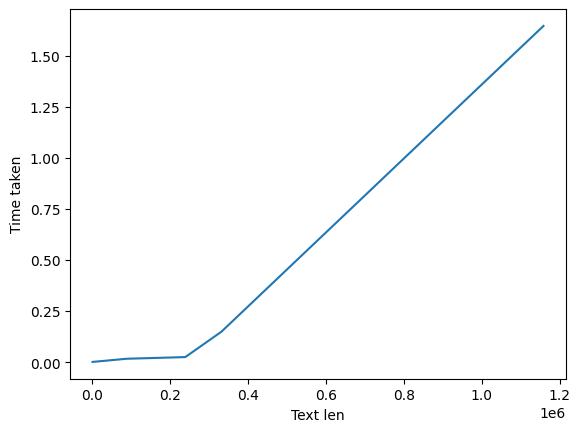

In [66]:
test_huffman()

З даного графіку ми можемо зробити висновок, що алгоритм Гаффмана краще працює на файлах меншого розміру і на файлах з великою кількістю повторюваних елементів. 